# Importing the necessary packages and dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Importing the HolyCollegeBasketball csv file

In [3]:
games = pd.read_csv('HolyCollegeBasketball.csv')

Editing a column name to match the rest

In [4]:
games.rename(columns = {'Team':'TEAM'}, inplace = True)
games.head()

,YEAR,TEAM,DATE,LOCATION,OPPONENT,RESULT,TEAMSCORE,OPPSCORE,RECORD,WAB,...,REC1YRAGOW,REC1YRAGOL,REC2YRAGOW,REC2YRAGOL,REC3YRAGOW,REC3YRAGOL,REC4YRAGOW,REC4YRAGOL,REC5YRAGOW,REC5YRAGOL
0,2018,Arizona,Fri 11-10,H,Northern Arizona,W,101,67,1-0,0.0,...,32,5,25,9,34,4,33,5,27,8
1,2018,Arizona,Sun 11-12,H,UMBC,W,103,78,2-0,0.1,...,32,5,25,9,34,4,33,5,27,8
2,2018,Arizona,Thu 11-16,H,Cal St. Bakersfield,W,91,59,3-0,0.2,...,32,5,25,9,34,4,33,5,27,8
3,2018,Arizona,Wed 11-22,N,North Carolina St.,L,84,90,3-1,-0.4,...,32,5,25,9,34,4,33,5,27,8
4,2018,Arizona,Thu 11-23,N,SMU,L,60,66,3-2,-1.1,...,32,5,25,9,34,4,33,5,27,8


Creating dummy variables for a win or a loss

In [5]:
gamedum = pd.get_dummies(data=games, columns=['RESULT'])
gamedum[['REC1YRAGOW', 'REC1YRAGOL', 
             'REC2YRAGOW', 'REC2YRAGOL', 
             'REC3YRAGOW', 'REC3YRAGOL', 
             'REC4YRAGOW', 'REC4YRAGOL', 
             'REC5YRAGOW', 'REC5YRAGOL']] = gamedum[['REC1YRAGOW', 'REC1YRAGOL', 
             'REC2YRAGOW', 'REC2YRAGOL', 
             'REC3YRAGOW', 'REC3YRAGOL', 
             'REC4YRAGOW', 'REC4YRAGOL', 
             'REC5YRAGOW', 'REC5YRAGOL']].astype(float)
gamedum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        1920 non-null   int64  
 1   TEAM        1920 non-null   object 
 2   DATE        1920 non-null   object 
 3   LOCATION    1920 non-null   object 
 4   OPPONENT    1920 non-null   object 
 5   TEAMSCORE   1920 non-null   int64  
 6   OPPSCORE    1920 non-null   int64  
 7   RECORD      1920 non-null   object 
 8   WAB         1920 non-null   float64
 9   ADJO        1920 non-null   object 
 10  ADJD        1920 non-null   object 
 11  OPPP        1920 non-null   float64
 12  OEFG%       1920 non-null   float64
 13  OTO%        1920 non-null   float64
 14  OOR%        1920 non-null   float64
 15  OFTR        1920 non-null   float64
 16  DPPP        1920 non-null   float64
 17  DEFG%       1920 non-null   float64
 18  DTO%        1920 non-null   float64
 19  DOR%        1920 non-null  

# Model below shows the chances of a PAC-12 team winning a game

This is based only on the teams records over the last 5 years.

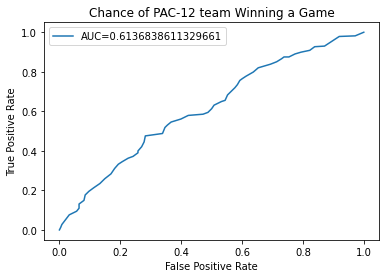

In [6]:
from sklearn import metrics

y = gamedum['RESULT_W']
X = gamedum[['REC1YRAGOW', 'REC1YRAGOL', 
             'REC2YRAGOW', 'REC2YRAGOL', 
             'REC3YRAGOW', 'REC3YRAGOL', 
             'REC4YRAGOW', 'REC4YRAGOL', 
             'REC5YRAGOW', 'REC5YRAGOL']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 10)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr, label='AUC='+str(auc))
plt.title('Chance of PAC-12 team Winning a Game')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

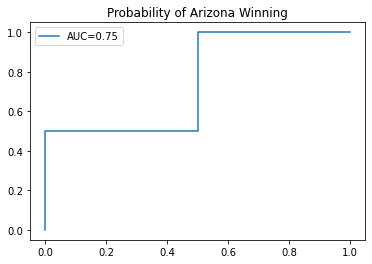

In [7]:
def holypoop(team1, team2):
    home = pd.DataFrame(data=gamedum[gamedum['TEAM']==team1])
    matchup = home[home['OPPONENT'] == team2]
    
    y1 = matchup['RESULT_W']
    X1 = matchup[['OFTR', 'OTO%','DTO%', 'OEFG%', 'DEFG%', 'REC1YRAGOW', 'REC1YRAGOL', 
                 'REC2YRAGOW', 'REC2YRAGOL', 
                 'REC3YRAGOW', 'REC3YRAGOL', 
                 'REC4YRAGOW', 'REC4YRAGOL', 
                 'REC5YRAGOW', 'REC5YRAGOL']]

    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.6, test_size=0.4, random_state = 10)

    logreg1 = LogisticRegression()

    logreg1.fit(X1_train, y1_train)
    y1_pred = logreg1.predict_proba(X1_test)[::,1]

    fpr1, tpr1, thresholds1 = metrics.roc_curve(y1_test, y1_pred)
    auc1 = metrics.roc_auc_score(y1_test, y1_pred)
    
    plt.plot(fpr1,tpr1, label='AUC='+str(auc1))
    plt.title('Probability of {} Winning'.format(team1))
    plt.legend()
    plt.show()
    
choice1 = 'Arizona' #input('Pick one PAC-12 team: ')
choice2 = 'Arizona St.' #input('Pick another PAC-12 team: ')

holypoop(choice1, choice2)



# Trying something else"

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()


pca = PCA(n_components=2)

y = gamedum['RESULT_W']
X = gamedum[['OFTR', 'OTO%','DTO%', 'OEFG%', 'DEFG%', 'REC1YRAGOW', 'REC1YRAGOL', 
                 'REC2YRAGOW', 'REC2YRAGOL', 
                 'REC3YRAGOW', 'REC3YRAGOL', 
                 'REC4YRAGOW', 'REC4YRAGOL', 
                 'REC5YRAGOW', 'REC5YRAGOL']]

model=scaler.fit(X)
X1 = model.transform(X)

X_tr_pca = pca.fit_transform(X1)

principalDF = pd.DataFrame(data=X_tr_pca, columns=['pca1', 'pca2'])

finalDF = pd.concat([principalDF, gamedum[['RESULT_W']]], axis=1)
finalDF

,pca1,pca2,RESULT_W
0,5.340196,0.412667,1
1,5.322090,0.271675,1
2,5.342205,0.523936,1
3,5.217506,0.687223,0
4,5.130111,0.173881,0
...,...,...,...
1915,-2.817134,-1.071910,0
1916,-2.767793,-1.386848,1
1917,-2.807059,-1.209711,1
1918,-2.719703,-1.184696,1


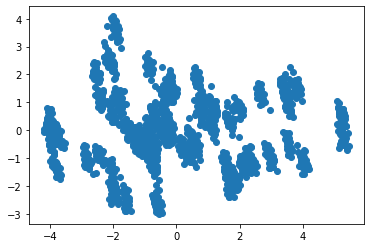

In [34]:
plt.scatter(finalDF['pca1'], finalDF['pca2'])

In [35]:
np.cumsum(pca.explained_variance_ratio_)

array([0.34733985, 0.45680735])